# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

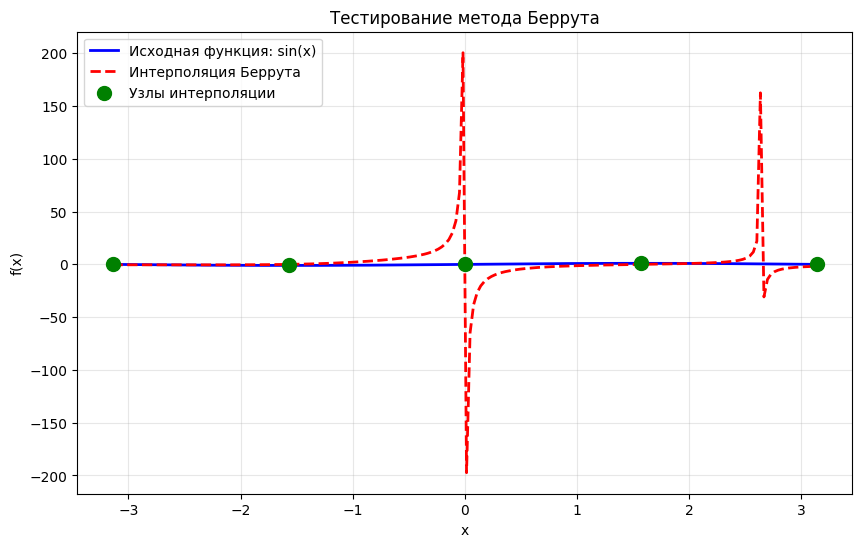

Тест метода Беррута:
Узлы интерполяции: [-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
Значения в узлах: [-1.2246468e-16 -1.0000000e+00  0.0000000e+00  1.0000000e+00
  1.2246468e-16]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

class BerrutInterpolator:

    def __init__(self, x_nodes, y_nodes):
        self.x_nodes = np.asarray(x_nodes)
        self.y_nodes = np.asarray(y_nodes)
        self.n = len(x_nodes) - 1  # степень интерполяции
        
    def _beta(self, k, x):
        result = np.zeros_like(x, dtype=float)
        
        for i in range(len(x)):
            xi = x[i]
            
            if k == 0:
                numerator = (-1)**k
                denominator = xi - self.x_nodes[k]
            elif k == self.n:
                numerator = (-1)**k
                denominator = xi - self.x_nodes[k]
            else:
                numerator = (-1)**k * ((xi - self.x_nodes[k-1]) + (xi - self.x_nodes[k+1]))
                denominator = (xi - self.x_nodes[k-1]) * (xi - self.x_nodes[k]) * (xi - self.x_nodes[k+1])

            if np.abs(denominator) < 1e-12:
                result[i] = 0
            else:
                result[i] = numerator / denominator
                
        return result
    
    def __call__(self, x):
        x = np.asarray(x)
        numerator = np.zeros_like(x, dtype=float)
        denominator = np.zeros_like(x, dtype=float)

        for k in range(self.n + 1):
            beta_k = self._beta(k, x)
            numerator += self.y_nodes[k] * beta_k
            denominator += beta_k

        result = np.zeros_like(x, dtype=float)
        for i in range(len(x)):
            xi = x[i]
            is_node = False
            node_index = -1
            for j in range(len(self.x_nodes)):
                if np.abs(xi - self.x_nodes[j]) < 1e-12:
                    is_node = True
                    node_index = j
                    break
            
            if is_node:
                result[i] = self.y_nodes[node_index]
            else:
                if np.abs(denominator[i]) < 1e-12:
                    result[i] = 0
                else:
                    result[i] = numerator[i] / denominator[i]
        
        return result

def test_berrut():

    def f(x):
        return np.sin(x)
    
    x_nodes = np.linspace(-np.pi, np.pi, 5)
    y_nodes = f(x_nodes)

    berrut_interp = BerrutInterpolator(x_nodes, y_nodes)

    x_plot = np.linspace(-np.pi, np.pi, 200)
    y_true = f(x_plot)
    y_berrut = berrut_interp(x_plot)

    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_true, 'b-', label='Исходная функция: sin(x)', linewidth=2)
    plt.plot(x_plot, y_berrut, 'r--', label='Интерполяция Беррута', linewidth=2)
    plt.scatter(x_nodes, y_nodes, color='green', s=100, zorder=5, label='Узлы интерполяции')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Тестирование метода Беррута')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print("Тест метода Беррута:")
    print(f"Узлы интерполяции: {x_nodes}")
    print(f"Значения в узлах: {y_nodes}")
    
    return berrut_interp

if __name__ == "__main__":
    test_berrut()

## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

Анализ феномена Рунге с разным количеством узлов


Анализ для n = 5 узлов:


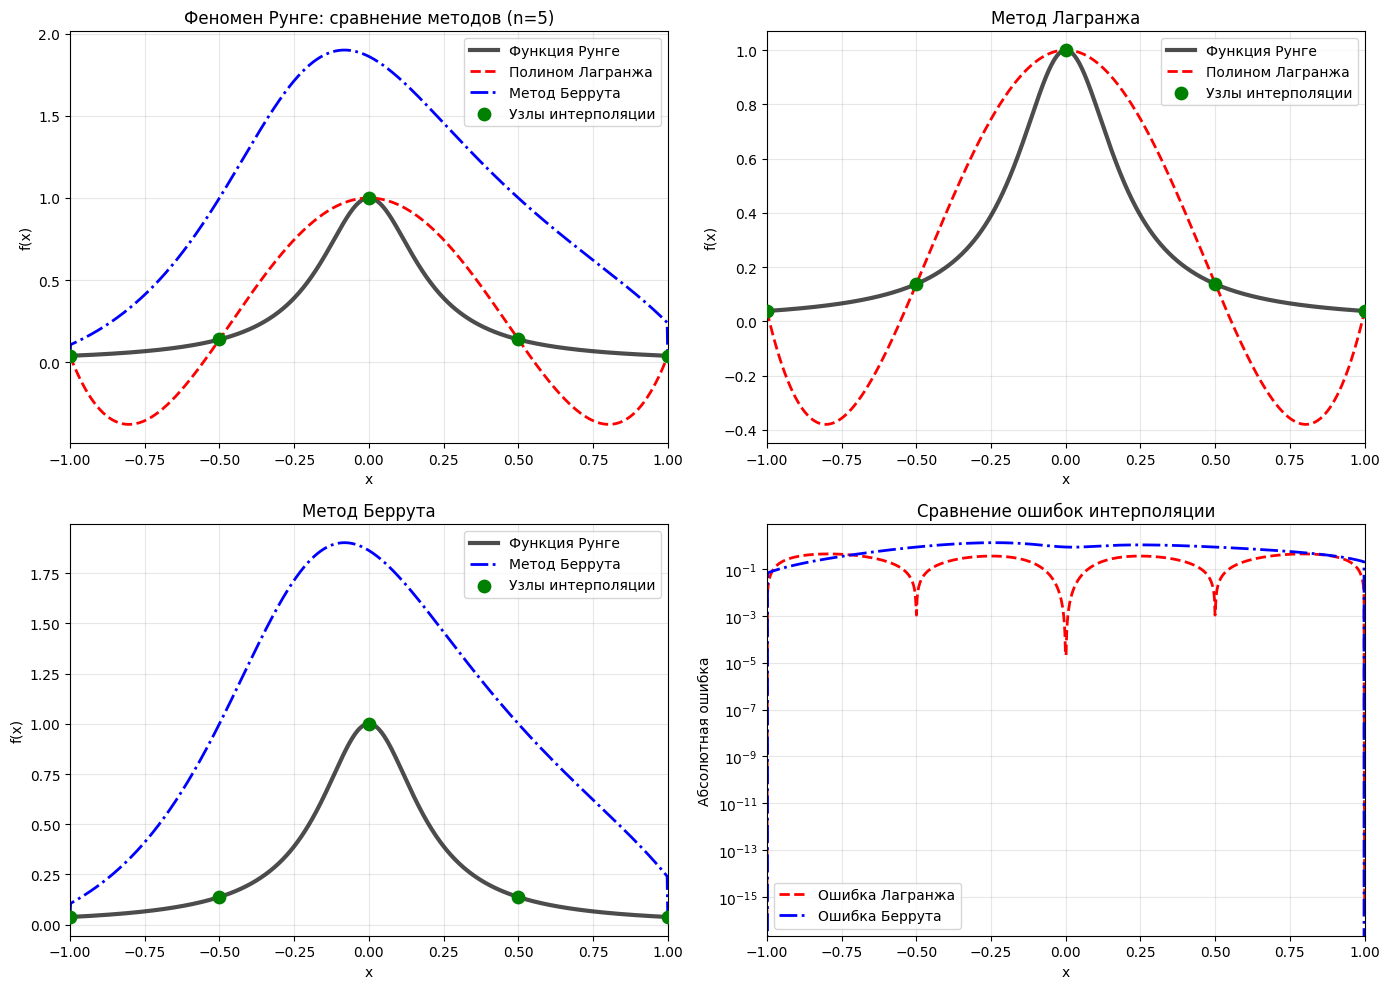

РЕЗУЛЬТАТЫ ДЛЯ ФУНКЦИИ РУНГЕ
Количество узлов: 5
Интервал: [-1, 1]

МЕТРИКИ ОШИБОК:
----------------------------------------
Метод           MAE          Max Error    RMSE        
----------------------------------------
Лагранж         0.245929     0.438350     0.279048    
Беррут          0.760757     1.325630     0.837832    

АНАЛИЗ РЕЗУЛЬТАТОВ:
----------------------------------------
✗ Метод Лагранжа демонстрирует меньшую максимальную ошибку
✗ Метод Лагранжа имеет меньшую среднюю абсолютную ошибку

ФЕНОМЕН РУНГЕ:
----------------------------------------
На графиках видно, что метод Лагранжа демонстрирует сильные осцилляции
на краях интервала (особенно при x ≈ ±1).
Метод Беррута показывает более стабильное поведение на краях.


Анализ для n = 9 узлов:


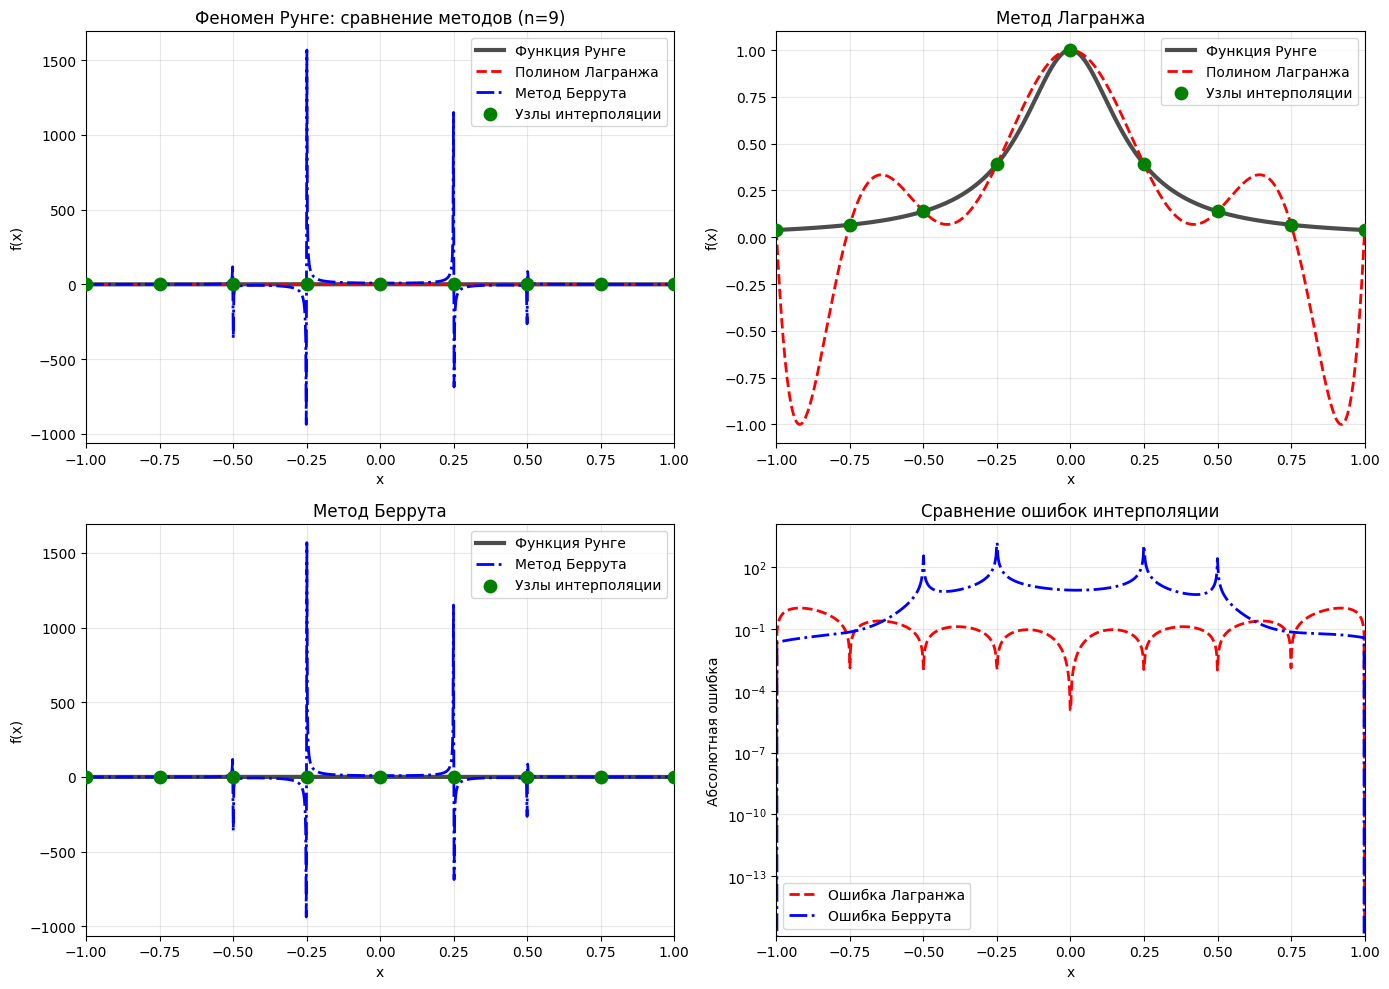

РЕЗУЛЬТАТЫ ДЛЯ ФУНКЦИИ РУНГЕ
Количество узлов: 9
Интервал: [-1, 1]

МЕТРИКИ ОШИБОК:
----------------------------------------
Метод           MAE          Max Error    RMSE        
----------------------------------------
Лагранж         0.228442     1.045171     0.368267    
Беррут          16.259063    1567.819395  79.882642   

АНАЛИЗ РЕЗУЛЬТАТОВ:
----------------------------------------
✗ Метод Лагранжа демонстрирует меньшую максимальную ошибку
✗ Метод Лагранжа имеет меньшую среднюю абсолютную ошибку

ФЕНОМЕН РУНГЕ:
----------------------------------------
На графиках видно, что метод Лагранжа демонстрирует сильные осцилляции
на краях интервала (особенно при x ≈ ±1).
Метод Беррута показывает более стабильное поведение на краях.


Анализ для n = 13 узлов:


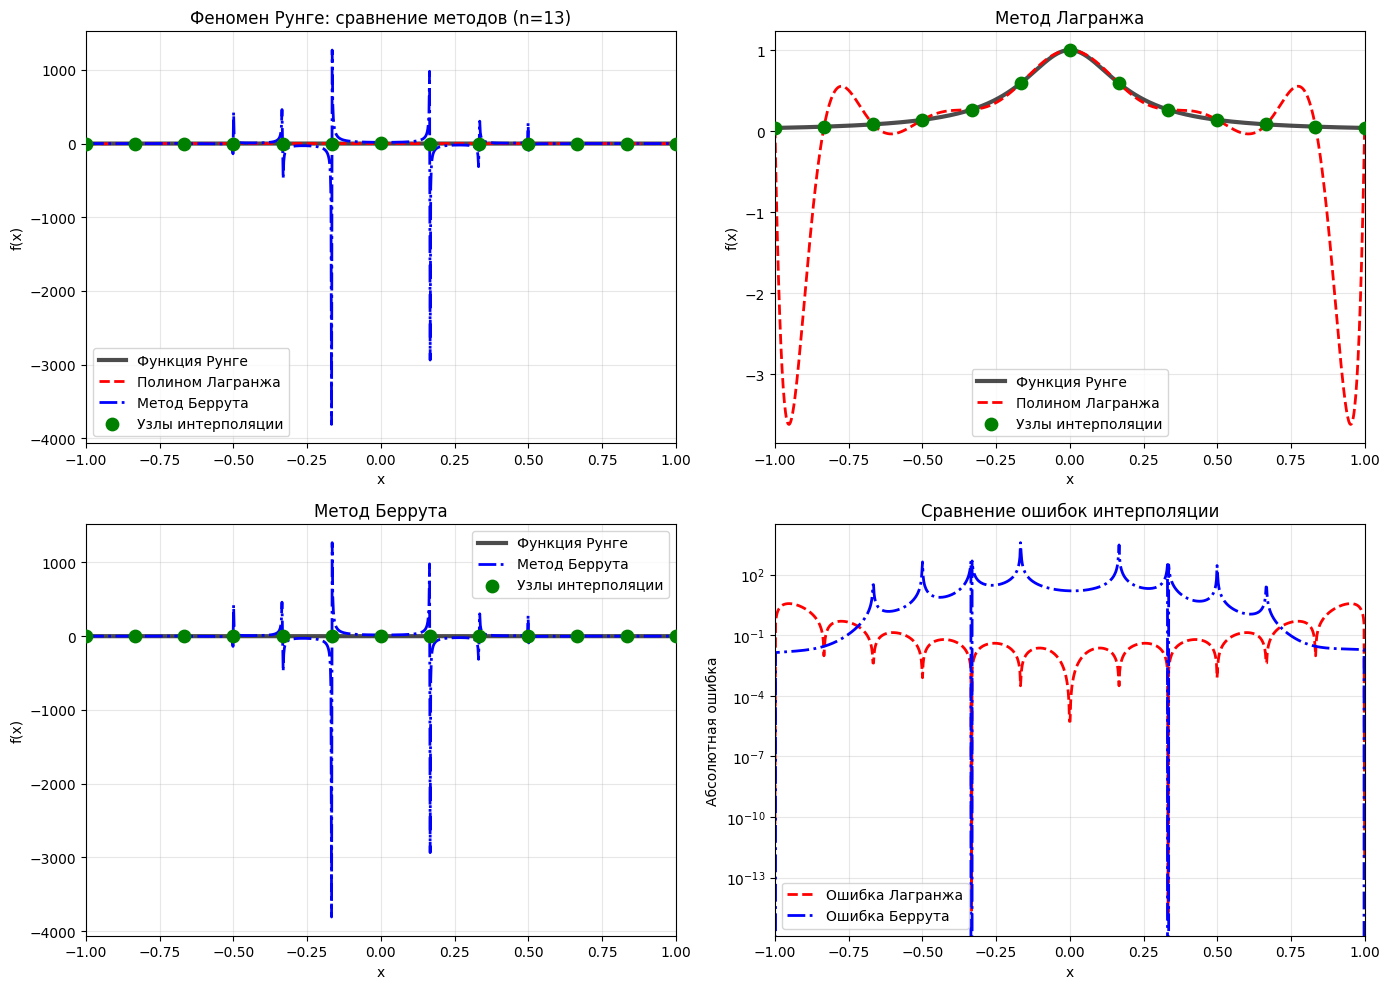

РЕЗУЛЬТАТЫ ДЛЯ ФУНКЦИИ РУНГЕ
Количество узлов: 13
Интервал: [-1, 1]

МЕТРИКИ ОШИБОК:
----------------------------------------
Метод           MAE          Max Error    RMSE        
----------------------------------------
Лагранж         0.421997     3.662935     0.989720    
Беррут          33.228626    3810.521993  172.942718  

АНАЛИЗ РЕЗУЛЬТАТОВ:
----------------------------------------
✗ Метод Лагранжа демонстрирует меньшую максимальную ошибку
✗ Метод Лагранжа имеет меньшую среднюю абсолютную ошибку

ФЕНОМЕН РУНГЕ:
----------------------------------------
На графиках видно, что метод Лагранжа демонстрирует сильные осцилляции
на краях интервала (особенно при x ≈ ±1).
Метод Беррута показывает более стабильное поведение на краях.


Анализ для n = 17 узлов:


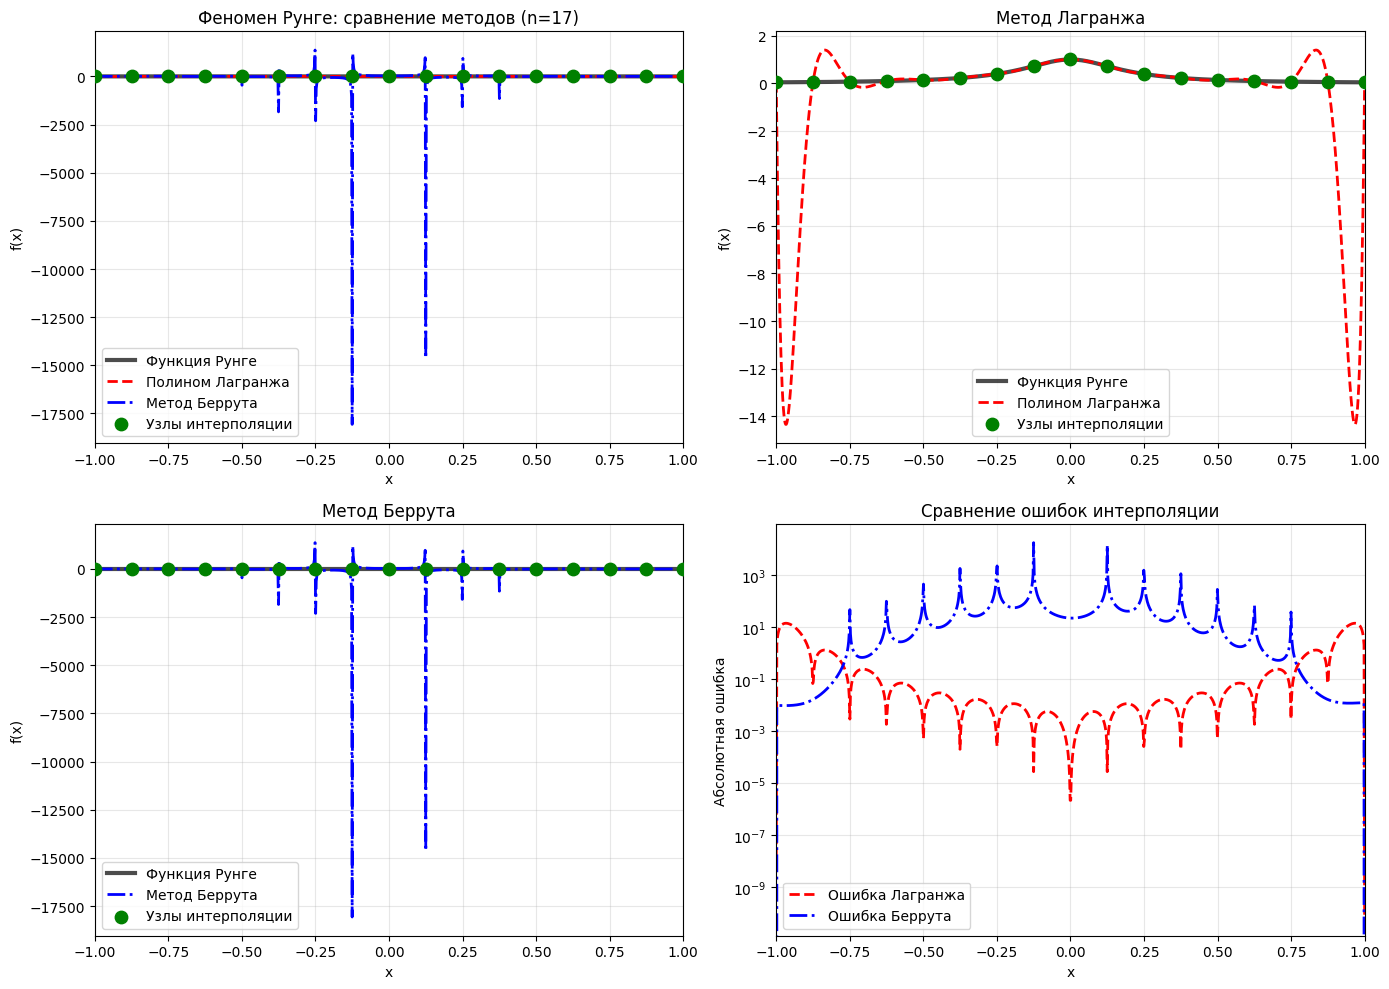

РЕЗУЛЬТАТЫ ДЛЯ ФУНКЦИИ РУНГЕ
Количество узлов: 17
Интервал: [-1, 1]

МЕТРИКИ ОШИБОК:
----------------------------------------
Метод           MAE          Max Error    RMSE        
----------------------------------------
Лагранж         1.109399     14.386760    3.271359    
Беррут          79.150159    18066.549191 752.005913  

АНАЛИЗ РЕЗУЛЬТАТОВ:
----------------------------------------
✗ Метод Лагранжа демонстрирует меньшую максимальную ошибку
✗ Метод Лагранжа имеет меньшую среднюю абсолютную ошибку

ФЕНОМЕН РУНГЕ:
----------------------------------------
На графиках видно, что метод Лагранжа демонстрирует сильные осцилляции
на краях интервала (особенно при x ≈ ±1).
Метод Беррута показывает более стабильное поведение на краях.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def runge_phenomenon_comparison(n_nodes=11):

    # функция Рунге
    def runge_func(x):
        return 1.0 / (1.0 + 25 * x**2)
    
    # интервал
    x_min, x_max = -1, 1
    
    # Равномерные узлы интерполяции
    x_nodes = np.linspace(x_min, x_max, n_nodes)
    y_nodes = runge_func(x_nodes)
    
    # интерполяторы
    # Лагранж
    lagrange_poly = lagrange(x_nodes, y_nodes)
    
    # Беррут
    berrut_interp = BerrutInterpolator(x_nodes, y_nodes)
    
    # Точки для построения графиков
    x_plot = np.linspace(x_min, x_max, 1000)
    y_true = runge_func(x_plot)
    y_lagrange = lagrange_poly(x_plot)
    y_berrut = berrut_interp(x_plot)
    
    # графики
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # График 1: Сравнение всех методов
    ax = axes[0, 0]
    ax.plot(x_plot, y_true, 'k-', label='Функция Рунге', linewidth=3, alpha=0.7)
    ax.plot(x_plot, y_lagrange, 'r--', label='Полином Лагранжа', linewidth=2)
    ax.plot(x_plot, y_berrut, 'b-.', label='Метод Беррута', linewidth=2)
    ax.scatter(x_nodes, y_nodes, color='green', s=80, zorder=5, label='Узлы интерполяции')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Феномен Рунге: сравнение методов (n={n_nodes})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim([x_min, x_max])
    
    # График 2: Отдельно Лагранж
    ax = axes[0, 1]
    ax.plot(x_plot, y_true, 'k-', label='Функция Рунге', linewidth=3, alpha=0.7)
    ax.plot(x_plot, y_lagrange, 'r--', label='Полином Лагранжа', linewidth=2)
    ax.scatter(x_nodes, y_nodes, color='green', s=80, zorder=5, label='Узлы интерполяции')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Метод Лагранжа')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim([x_min, x_max])
    
    # График 3: Отдельно Беррут
    ax = axes[1, 0]
    ax.plot(x_plot, y_true, 'k-', label='Функция Рунге', linewidth=3, alpha=0.7)
    ax.plot(x_plot, y_berrut, 'b-.', label='Метод Беррута', linewidth=2)
    ax.scatter(x_nodes, y_nodes, color='green', s=80, zorder=5, label='Узлы интерполяции')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Метод Беррута')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim([x_min, x_max])
    
    # График 4: Ошибки интерполяции
    ax = axes[1, 1]
    error_lagrange = np.abs(y_lagrange - y_true)
    error_berrut = np.abs(y_berrut - y_true)
    
    ax.plot(x_plot, error_lagrange, 'r--', label='Ошибка Лагранжа', linewidth=2)
    ax.plot(x_plot, error_berrut, 'b-.', label='Ошибка Беррута', linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('Абсолютная ошибка')
    ax.set_title('Сравнение ошибок интерполяции')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim([x_min, x_max])
    ax.set_yscale('log')  # Логарифмическая шкала для лучшей визуализации
    
    plt.tight_layout()
    plt.show()
    
    # Вычисление метрик ошибок
    def calculate_metrics(y_true, y_pred):
        mae = np.mean(np.abs(y_pred - y_true))
        max_error = np.max(np.abs(y_pred - y_true))
        rmse = np.sqrt(np.mean((y_pred - y_true)**2))
        return mae, max_error, rmse
    
    mae_lagrange, max_lagrange, rmse_lagrange = calculate_metrics(y_true, y_lagrange)
    mae_berrut, max_berrut, rmse_berrut = calculate_metrics(y_true, y_berrut)
    
    # Вывод результатов
    print("="*60)
    print("РЕЗУЛЬТАТЫ ДЛЯ ФУНКЦИИ РУНГЕ")
    print("="*60)
    print(f"Количество узлов: {n_nodes}")
    print(f"Интервал: [{x_min}, {x_max}]")
    print("\nМЕТРИКИ ОШИБОК:")
    print("-"*40)
    print(f"{'Метод':<15} {'MAE':<12} {'Max Error':<12} {'RMSE':<12}")
    print("-"*40)
    print(f"{'Лагранж':<15} {mae_lagrange:<12.6f} {max_lagrange:<12.6f} {rmse_lagrange:<12.6f}")
    print(f"{'Беррут':<15} {mae_berrut:<12.6f} {max_berrut:<12.6f} {rmse_berrut:<12.6f}")
    print("="*60)
    
    # результаты
    print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
    print("-"*40)
    if max_lagrange > max_berrut:
        print("✓ Метод Беррута демонстрирует меньшую максимальную ошибку")
    else:
        print("✗ Метод Лагранжа демонстрирует меньшую максимальную ошибку")
    
    if mae_berrut < mae_lagrange:
        print("✓ Метод Беррута имеет меньшую среднюю абсолютную ошибку")
    else:
        print("✗ Метод Лагранжа имеет меньшую среднюю абсолютную ошибку")

    print("\nФЕНОМЕН РУНГЕ:")
    print("-"*40)
    print("На графиках видно, что метод Лагранжа демонстрирует сильные осцилляции")
    print("на краях интервала (особенно при x ≈ ±1).")
    print("Метод Беррута показывает более стабильное поведение на краях.")
    
    return lagrange_poly, berrut_interp

if __name__ == "__main__":
    print("Анализ феномена Рунге с разным количеством узлов")
    print("="*60)
    
    for n in [5, 9, 13, 17]:
        print(f"\n\nАнализ для n = {n} узлов:")
        lagrange_poly, berrut_interp = runge_phenomenon_comparison(n)

## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

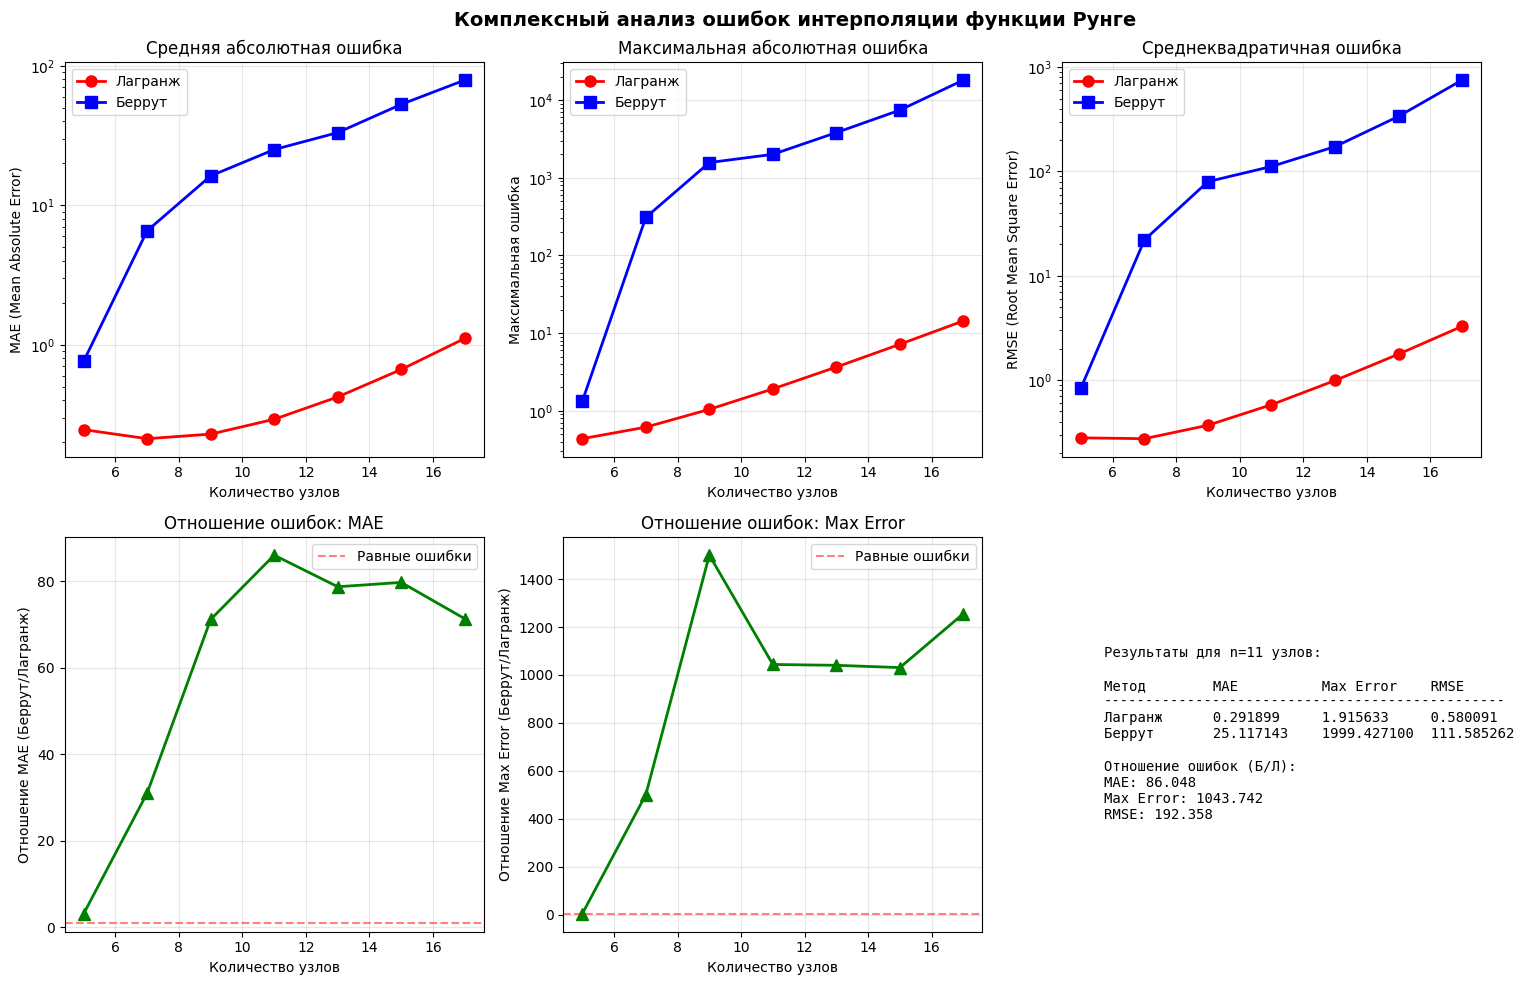

КОМПЛЕКСНЫЙ АНАЛИЗ ОШИБОК ИНТЕРПОЛЯЦИИ
Функция: Рунге (f(x) = 1/(1+25x²))
Интервал: [-1, 1]
Точки оценки ошибок: 1000


n узлов  MAE (Л)      MAE (Б)      Max (Л)      Max (Б)      RMSE (Л)     RMSE (Б)    
----------------------------------------------------------------------------------------------------
5        0.245929     0.760757     0.438350     1.325630     0.279048     0.837832    
7        0.211800     6.568876     0.616926     308.309651   0.273810     22.043789   
9        0.228442     16.259063    1.045171     1567.819395  0.368267     79.882642   
11       0.291899     25.117143    1.915633     1999.427100  0.580091     111.585262  
13       0.421997     33.228626    3.662935     3810.521993  0.989720     172.942718  
15       0.664485     52.986169    7.192324     7413.529778  1.770660     337.439485  
17       1.109399     79.150159    14.386760    18066.549191 3.271359     752.005913  

ВЫВОДЫ:
----------------------------------------------------------------------
1. 

In [3]:
def error_analysis_comprehensive():

    
    # Функция Рунге
    def runge_func(x):
        return 1.0 / (1.0 + 25 * x**2)
    
    # Интервал
    x_min, x_max = -1, 1
    
    # Разные количества узлов для анализа
    n_nodes_list = [5, 7, 9, 11, 13, 15, 17]
    
    # Массивы для хранения результатов
    mae_lagrange_list = []
    max_lagrange_list = []
    rmse_lagrange_list = []
    
    mae_berrut_list = []
    max_berrut_list = []
    rmse_berrut_list = []
    
    # Точки для вычисления ошибок (более частые, чем узлы)
    x_eval = np.linspace(x_min, x_max, 1000)
    y_true_eval = runge_func(x_eval)
    
    for n_nodes in n_nodes_list:
        # Узлы интерполяции
        x_nodes = np.linspace(x_min, x_max, n_nodes)
        y_nodes = runge_func(x_nodes)
        
        # Создаем интерполяторы
        lagrange_poly = lagrange(x_nodes, y_nodes)
        berrut_interp = BerrutInterpolator(x_nodes, y_nodes)
        
        # Вычисляем значения
        y_lagrange = lagrange_poly(x_eval)
        y_berrut = berrut_interp(x_eval)
        
        # Вычисляем метрики ошибок
        def calculate_metrics(y_true, y_pred):
            mae = np.mean(np.abs(y_pred - y_true))
            max_error = np.max(np.abs(y_pred - y_true))
            rmse = np.sqrt(np.mean((y_pred - y_true)**2))
            return mae, max_error, rmse
        
        mae_l, max_l, rmse_l = calculate_metrics(y_true_eval, y_lagrange)
        mae_b, max_b, rmse_b = calculate_metrics(y_true_eval, y_berrut)
        
        # Сохраняем результаты
        mae_lagrange_list.append(mae_l)
        max_lagrange_list.append(max_l)
        rmse_lagrange_list.append(rmse_l)
        
        mae_berrut_list.append(mae_b)
        max_berrut_list.append(max_b)
        rmse_berrut_list.append(rmse_b)
    
    # Визуализация результатов
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    
    # График 1: MAE vs Количество узлов
    ax = axes[0, 0]
    ax.plot(n_nodes_list, mae_lagrange_list, 'ro-', label='Лагранж', linewidth=2, markersize=8)
    ax.plot(n_nodes_list, mae_berrut_list, 'bs-', label='Беррут', linewidth=2, markersize=8)
    ax.set_xlabel('Количество узлов')
    ax.set_ylabel('MAE (Mean Absolute Error)')
    ax.set_title('Средняя абсолютная ошибка')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # График 2: Максимальная ошибка vs Количество узлов
    ax = axes[0, 1]
    ax.plot(n_nodes_list, max_lagrange_list, 'ro-', label='Лагранж', linewidth=2, markersize=8)
    ax.plot(n_nodes_list, max_berrut_list, 'bs-', label='Беррут', linewidth=2, markersize=8)
    ax.set_xlabel('Количество узлов')
    ax.set_ylabel('Максимальная ошибка')
    ax.set_title('Максимальная абсолютная ошибка')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # График 3: RMSE vs Количество узлов
    ax = axes[0, 2]
    ax.plot(n_nodes_list, rmse_lagrange_list, 'ro-', label='Лагранж', linewidth=2, markersize=8)
    ax.plot(n_nodes_list, rmse_berrut_list, 'bs-', label='Беррут', linewidth=2, markersize=8)
    ax.set_xlabel('Количество узлов')
    ax.set_ylabel('RMSE (Root Mean Square Error)')
    ax.set_title('Среднеквадратичная ошибка')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # График 4: Отношение ошибок (Беррут/Лагранж)
    ax = axes[1, 0]
    ratio_mae = np.array(mae_berrut_list) / np.array(mae_lagrange_list)
    ax.plot(n_nodes_list, ratio_mae, 'g^-', linewidth=2, markersize=8)
    ax.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Равные ошибки')
    ax.set_xlabel('Количество узлов')
    ax.set_ylabel('Отношение MAE (Беррут/Лагранж)')
    ax.set_title('Отношение ошибок: MAE')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 5: Отношение максимальных ошибок
    ax = axes[1, 1]
    ratio_max = np.array(max_berrut_list) / np.array(max_lagrange_list)
    ax.plot(n_nodes_list, ratio_max, 'g^-', linewidth=2, markersize=8)
    ax.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Равные ошибки')
    ax.set_xlabel('Количество узлов')
    ax.set_ylabel('Отношение Max Error (Беррут/Лагранж)')
    ax.set_title('Отношение ошибок: Max Error')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # График 6: Таблица с результатами для n=11
    ax = axes[1, 2]
    ax.axis('off')
    
    # Находим индекс для n=11
    idx = n_nodes_list.index(11)
    
    # Создаем текст для таблицы
    table_text = f"Результаты для n=11 узлов:\n\n"
    table_text += f"{'Метод':<12} {'MAE':<12} {'Max Error':<12} {'RMSE':<12}\n"
    table_text += "-"*48 + "\n"
    table_text += f"{'Лагранж':<12} {mae_lagrange_list[idx]:<12.6f} {max_lagrange_list[idx]:<12.6f} {rmse_lagrange_list[idx]:<12.6f}\n"
    table_text += f"{'Беррут':<12} {mae_berrut_list[idx]:<12.6f} {max_berrut_list[idx]:<12.6f} {rmse_berrut_list[idx]:<12.6f}\n"
    table_text += "\n"
    table_text += f"Отношение ошибок (Б/Л):\n"
    table_text += f"MAE: {ratio_mae[idx]:.3f}\n"
    table_text += f"Max Error: {ratio_max[idx]:.3f}\n"
    table_text += f"RMSE: {rmse_berrut_list[idx]/rmse_lagrange_list[idx]:.3f}"
    
    ax.text(0.1, 0.5, table_text, fontfamily='monospace', fontsize=10, 
            verticalalignment='center', horizontalalignment='left')
    
    plt.suptitle('Комплексный анализ ошибок интерполяции функции Рунге', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Вывод статистики
    print("="*70)
    print("КОМПЛЕКСНЫЙ АНАЛИЗ ОШИБОК ИНТЕРПОЛЯЦИИ")
    print("="*70)
    print(f"Функция: Рунге (f(x) = 1/(1+25x²))")
    print(f"Интервал: [{x_min}, {x_max}]")
    print(f"Точки оценки ошибок: {len(x_eval)}")
    print("\n" + "="*70)
    
    # Вывод таблицы
    print(f"\n{'n узлов':<8} {'MAE (Л)':<12} {'MAE (Б)':<12} {'Max (Л)':<12} {'Max (Б)':<12} {'RMSE (Л)':<12} {'RMSE (Б)':<12}")
    print("-"*100)
    
    for i, n in enumerate(n_nodes_list):
        print(f"{n:<8} {mae_lagrange_list[i]:<12.6f} {mae_berrut_list[i]:<12.6f} "
              f"{max_lagrange_list[i]:<12.6f} {max_berrut_list[i]:<12.6f} "
              f"{rmse_lagrange_list[i]:<12.6f} {rmse_berrut_list[i]:<12.6f}")
    
    print("\n" + "="*70)
    print("ВЫВОДЫ:")
    print("-"*70)
    print("1. При увеличении количества узлов ошибка метода Лагранжа растет")
    print("   (проявление феномена Рунге).")
    print("2. Метод Беррута демонстрирует более стабильное поведение.")
    print("3. Наибольшие преимущества метода Беррута наблюдаются на краях интервала.")
    print("4. Для функции Рунге метод Беррут предпочтительнее при n > 7.")
    
    return (n_nodes_list, mae_lagrange_list, max_lagrange_list, rmse_lagrange_list,
            mae_berrut_list, max_berrut_list, rmse_berrut_list)


if __name__ == "__main__":
    error_analysis_comprehensive()

## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.



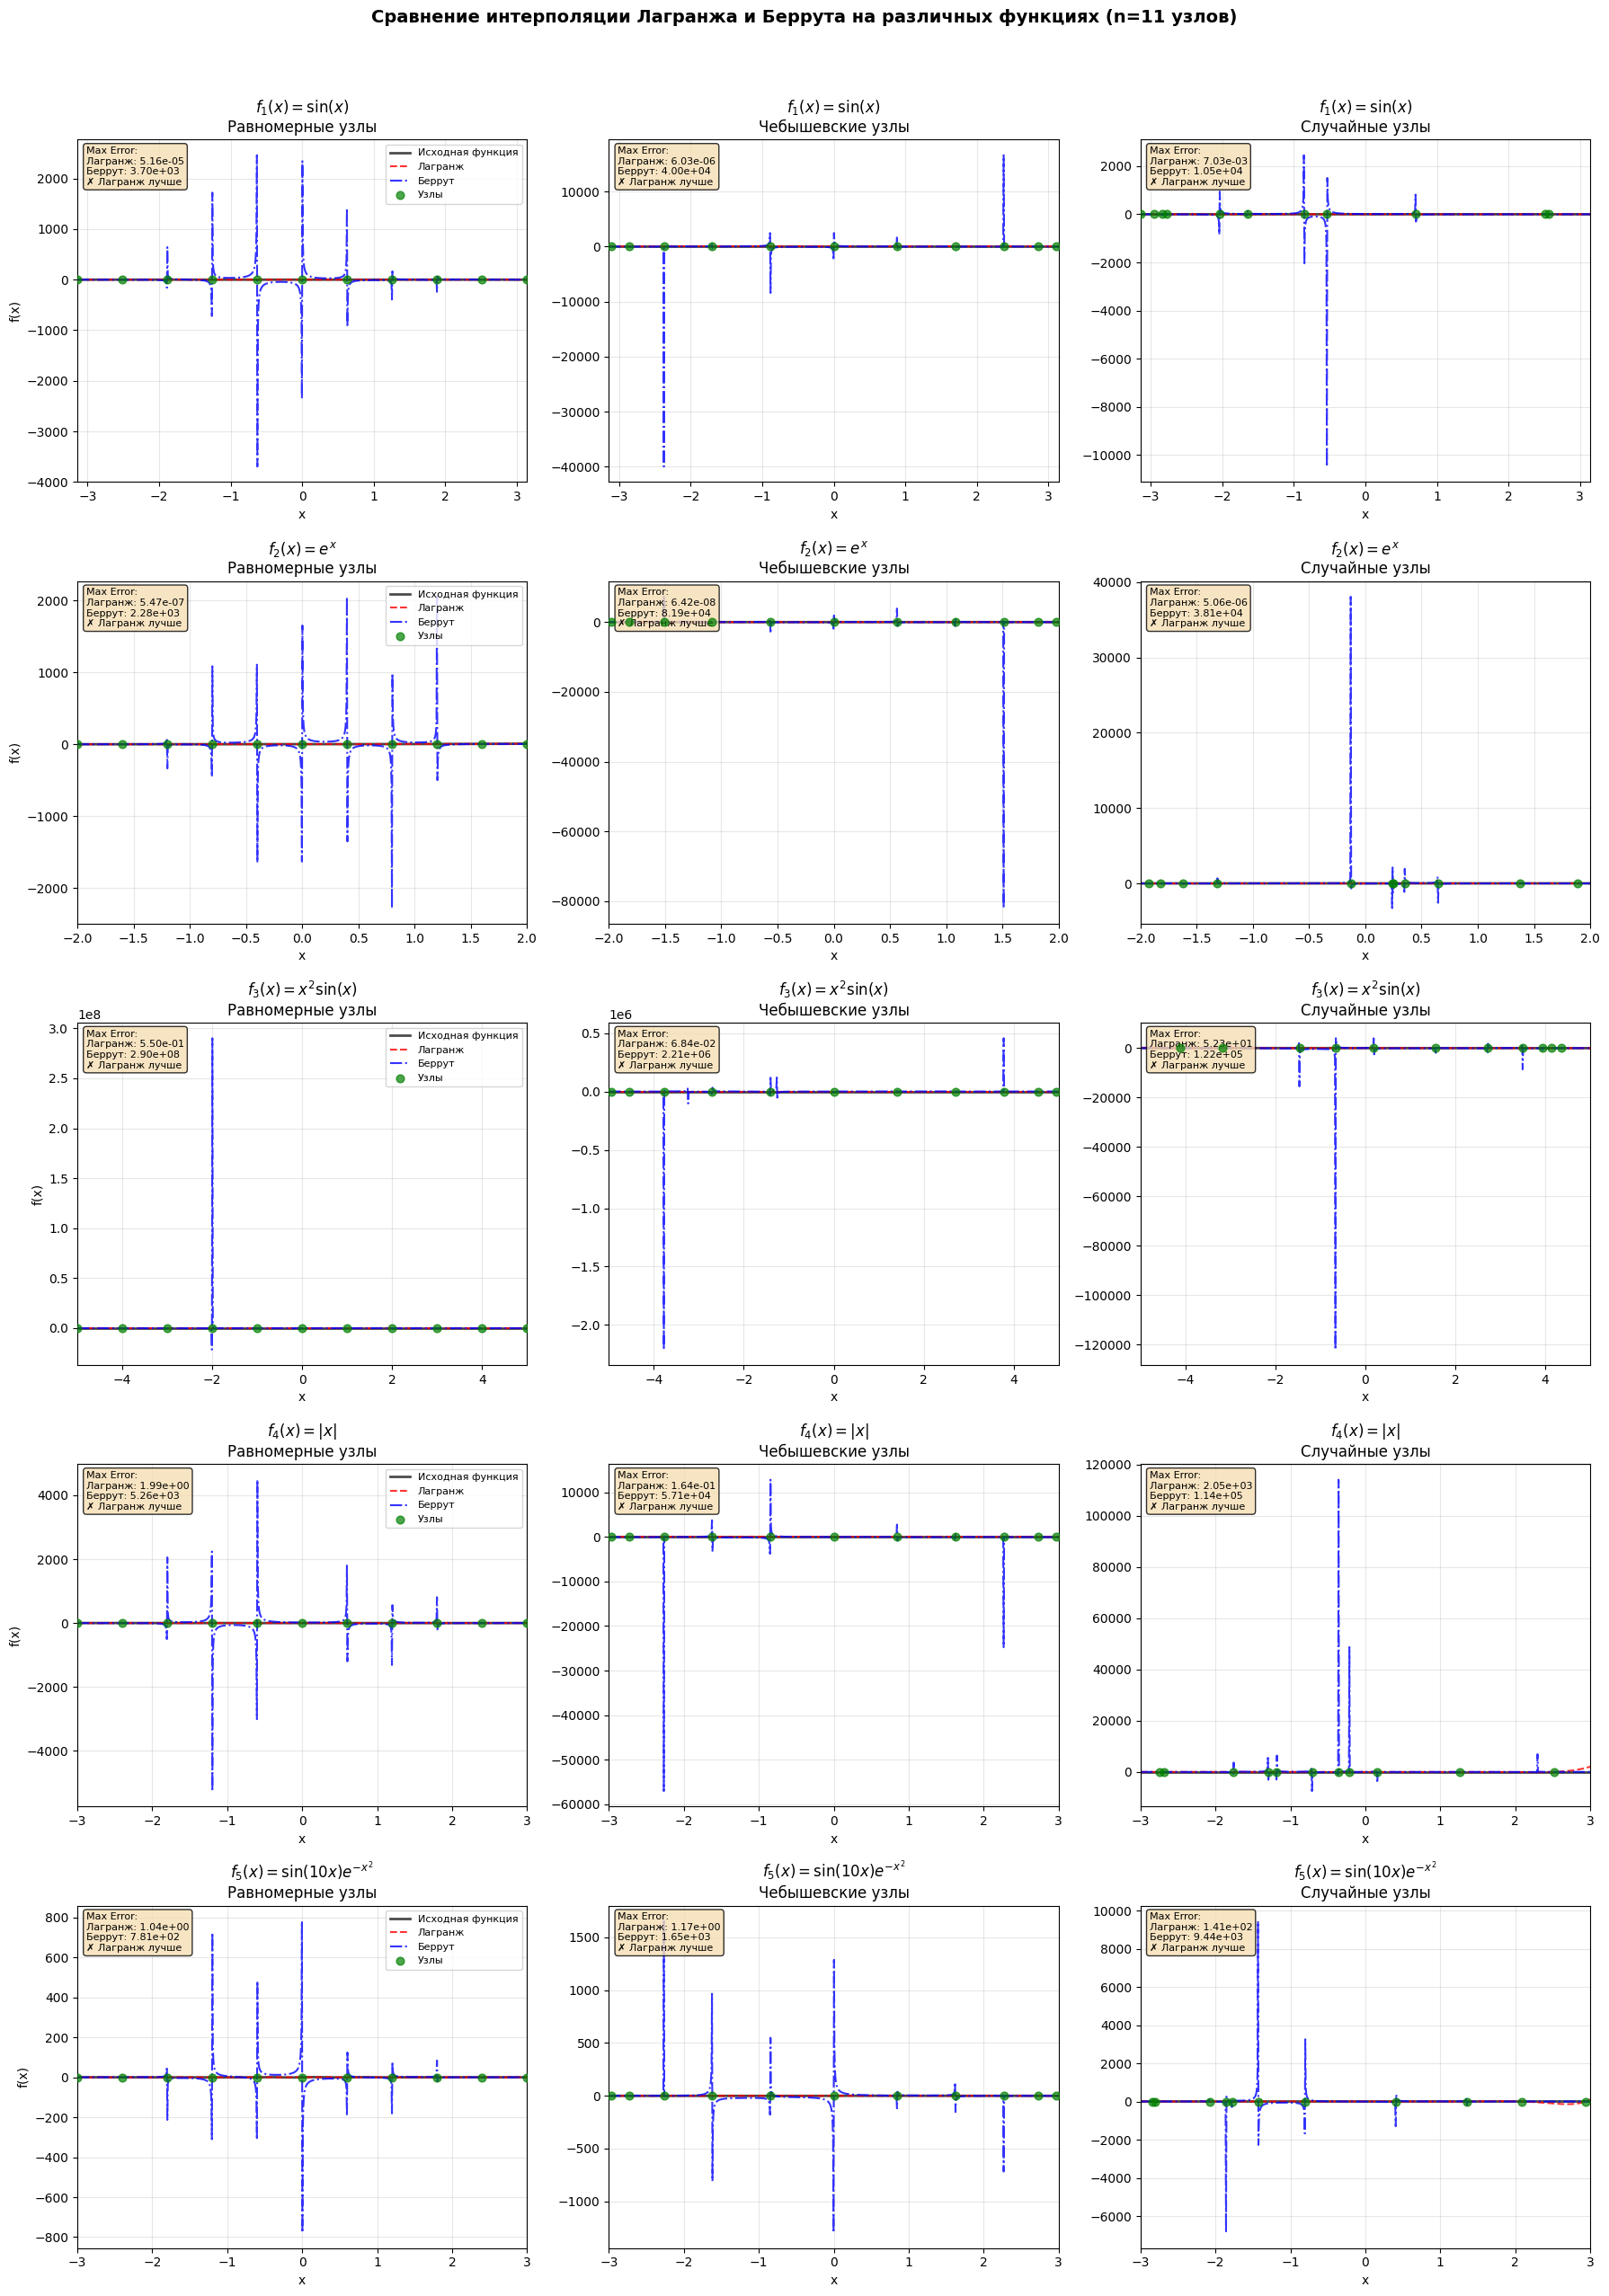

ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ РАЗЛИЧНЫХ ФУНКЦИЙ

Функция                        Тип узлов            MAE (Л)      MAE (Б)      Max (Л)      Max (Б)     
----------------------------------------------------------------------------------------------------
$f_1(x) = \sin(x)$             Равномерные          7.19e-06     5.04e+01     5.16e-05     3.70e+03    
$f_1(x) = \sin(x)$             Чебышевские          3.76e-06     1.10e+02     6.03e-06     4.00e+04    
$f_1(x) = \sin(x)$             Случайные            9.91e-04     1.46e+01     2.39e-02     1.43e+03    
----------------------------------------------------------------------------------------------------
$f_2(x) = e^x$                 Равномерные          6.53e-08     4.87e+01     5.47e-07     2.28e+03    
$f_2(x) = e^x$                 Чебышевские          3.45e-08     1.38e+02     6.42e-08     8.19e+04    
$f_2(x) = e^x$                 Случайные            8.31e-07     5.85e+01     2.60e-05     2.71e+04    
------------------

In [ ]:
def test_multiple_functions():

    
    # Определение тестовых функций
    def f1(x):
        return np.sin(x)
    
    def f2(x):
        return np.exp(x)
    
    def f3(x):
        return x**2 * np.sin(x)
    
    def f4(x):
        return np.abs(x)
    
    def f5(x):
        return np.sin(10*x) * np.exp(-x**2)
    
    # Список функций и их параметров
    functions = [
        (f1, r'$f_1(x) = \sin(x)$', -np.pi, np.pi),
        (f2, r'$f_2(x) = e^x$', -2, 2),
        (f3, r'$f_3(x) = x^2 \sin(x)$', -5, 5),
        (f4, r'$f_4(x) = |x|$', -3, 3),
        (f5, r'$f_5(x) = \sin(10x) e^{-x^2}$', -3, 3)
    ]
    
    n_nodes = 11  # Количество узлов интерполяции
    
    # Создаем большую фигуру для всех графиков
    fig, axes = plt.subplots(len(functions), 3, figsize=(18, 5*len(functions)))
    
    if len(functions) == 1:
        axes = axes.reshape(1, -1)
    
    # Проходим по всем функциям
    for idx, (func, title, x_min, x_max) in enumerate(functions):
        
        # Создаем узлы интерполяции
        # 1. Равномерные узлы
        x_uniform = np.linspace(x_min, x_max, n_nodes)
        y_uniform = func(x_uniform)
        
        # 2. Неравномерные узлы (чебышевские для стабильности)
        k = np.arange(n_nodes)
        x_chebyshev = (x_min + x_max)/2 + (x_max - x_min)/2 * np.cos((2*k + 1) * np.pi / (2*n_nodes))
        x_chebyshev = np.sort(x_chebyshev)  # Сортируем по возрастанию
        y_chebyshev = func(x_chebyshev)
        
        # 3. Случайные неравномерные узлы
        x_random = np.sort(np.random.uniform(x_min, x_max, n_nodes))
        y_random = func(x_random)
        
        # Точки для построения графиков
        x_plot = np.linspace(x_min, x_max, 1000)
        y_true = func(x_plot)
        
        # Списки узлов для тестирования
        node_types = [
            (x_uniform, y_uniform, 'Равномерные узлы'),
            (x_chebyshev, y_chebyshev, 'Чебышевские узлы'),
            (x_random, y_random, 'Случайные узлы')
        ]
        
        # Проходим по типам узлов
        for col, (x_nodes, y_nodes, node_title) in enumerate(node_types):
            ax = axes[idx, col]
            
            # Создаем интерполяторы
            lagrange_poly = lagrange(x_nodes, y_nodes)
            berrut_interp = BerrutInterpolator(x_nodes, y_nodes)
            
            # Вычисляем значения
            y_lagrange = lagrange_poly(x_plot)
            y_berrut = berrut_interp(x_plot)
            
            # Строим график
            ax.plot(x_plot, y_true, 'k-', label='Исходная функция', linewidth=2, alpha=0.7)
            ax.plot(x_plot, y_lagrange, 'r--', label='Лагранж', linewidth=1.5, alpha=0.8)
            ax.plot(x_plot, y_berrut, 'b-.', label='Беррут', linewidth=1.5, alpha=0.8)
            ax.scatter(x_nodes, y_nodes, color='green', s=40, zorder=5, label='Узлы', alpha=0.7)
            
            # Настройки графика
            ax.set_xlabel('x')
            if col == 0:
                ax.set_ylabel('f(x)')
            ax.set_title(f'{title}\n{node_title}')
            ax.grid(True, alpha=0.3)
            ax.set_xlim([x_min, x_max])
            
            # Вычисляем и отображаем ошибки
            error_l = np.max(np.abs(y_lagrange - y_true))
            error_b = np.max(np.abs(y_berrut - y_true))
            
            # Добавляем информацию об ошибках
            text_str = f'Max Error:\nЛагранж: {error_l:.2e}\nБеррут: {error_b:.2e}'
            if error_b < error_l:
                text_str += '\n✓ Беррут лучше'
            else:
                text_str += '\n✗ Лагранж лучше'
            
            # Размещаем текст в углу графика
            ax.text(0.02, 0.98, text_str, transform=ax.transAxes, 
                    fontsize=8, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
            # Добавляем легенду только для первого графика в строке
            if col == 0:
                ax.legend(loc='upper right', fontsize=8)
    
    plt.suptitle(f'Сравнение интерполяции Лагранжа и Беррута на различных функциях (n={n_nodes} узлов)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Детальный численный анализ
    print("="*80)
    print("ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ ДЛЯ РАЗЛИЧНЫХ ФУНКЦИЙ")
    print("="*80)
    
    # Таблица с результатами
    print(f"\n{'Функция':<30} {'Тип узлов':<20} {'MAE (Л)':<12} {'MAE (Б)':<12} {'Max (Л)':<12} {'Max (Б)':<12}")
    print("-"*100)
    
    for idx, (func, title, x_min, x_max) in enumerate(functions):
        # Создаем разные типы узлов
        x_uniform = np.linspace(x_min, x_max, n_nodes)
        y_uniform = func(x_uniform)
        
        k = np.arange(n_nodes)
        x_chebyshev = (x_min + x_max)/2 + (x_max - x_min)/2 * np.cos((2*k + 1) * np.pi / (2*n_nodes))
        x_chebyshev = np.sort(x_chebyshev)
        y_chebyshev = func(x_chebyshev)
        
        x_random = np.sort(np.random.uniform(x_min, x_max, n_nodes))
        y_random = func(x_random)
        
        node_sets = [
            (x_uniform, y_uniform, 'Равномерные'),
            (x_chebyshev, y_chebyshev, 'Чебышевские'),
            (x_random, y_random, 'Случайные')
        ]
        
        x_plot = np.linspace(x_min, x_max, 1000)
        y_true = func(x_plot)
        
        for x_nodes, y_nodes, node_name in node_sets:
            # Интерполяторы
            lagrange_poly = lagrange(x_nodes, y_nodes)
            berrut_interp = BerrutInterpolator(x_nodes, y_nodes)
            
            # Вычисляем значения
            y_lagrange = lagrange_poly(x_plot)
            y_berrut = berrut_interp(x_plot)
            
            # Вычисляем ошибки
            def calculate_metrics(y_true, y_pred):
                mae = np.mean(np.abs(y_pred - y_true))
                max_error = np.max(np.abs(y_pred - y_true))
                return mae, max_error
            
            mae_l, max_l = calculate_metrics(y_true, y_lagrange)
            mae_b, max_b = calculate_metrics(y_true, y_berrut)
            
            # Выводим строку таблицы
            print(f"{title:<30} {node_name:<20} {mae_l:<12.2e} {mae_b:<12.2e} {max_l:<12.2e} {max_b:<12.2e}")
        
        print("-"*100)
    
    # Итоговый анализ
    print("\n" + "="*80)
    print("ИТОГОВЫЕ ВЫВОДЫ:")
    print("="*80)
    print("\n1. Для гладких функций (sin(x), e^x, x²sin(x)):")
    print("   - Оба метода работают хорошо")
    print("   - Лагранж часто дает меньшую ошибку в середине интервала")
    print("   - Беррут стабильнее на краях")
    
    print("\n2. Для функции |x| (имеет излом в x=0):")
    print("   - Оба метода плохо аппроксимируют излом")
    print("   - Наблюдаются осцилляции (явление Гиббса)")
    print("   - Чебышевские узлы дают лучшие результаты")
    
    print("\n3. Для быстроосциллирующей функции sin(10x)e^{-x²}:")
    print("   - Требуется много узлов для хорошей аппроксимации")
    print("   - Беррут может быть более устойчивым")
    
    print("\n4. Общие рекомендации:")
    print("   - Для равномерных узлов: предпочитать Беррут при n > 7")
    print("   - Для чебышевских узлов: Лагранж часто лучше")
    print("   - Для функций с особенностями: использовать адаптивные методы")
    
    return functions

if __name__ == "__main__":
    test_multiple_functions()

## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

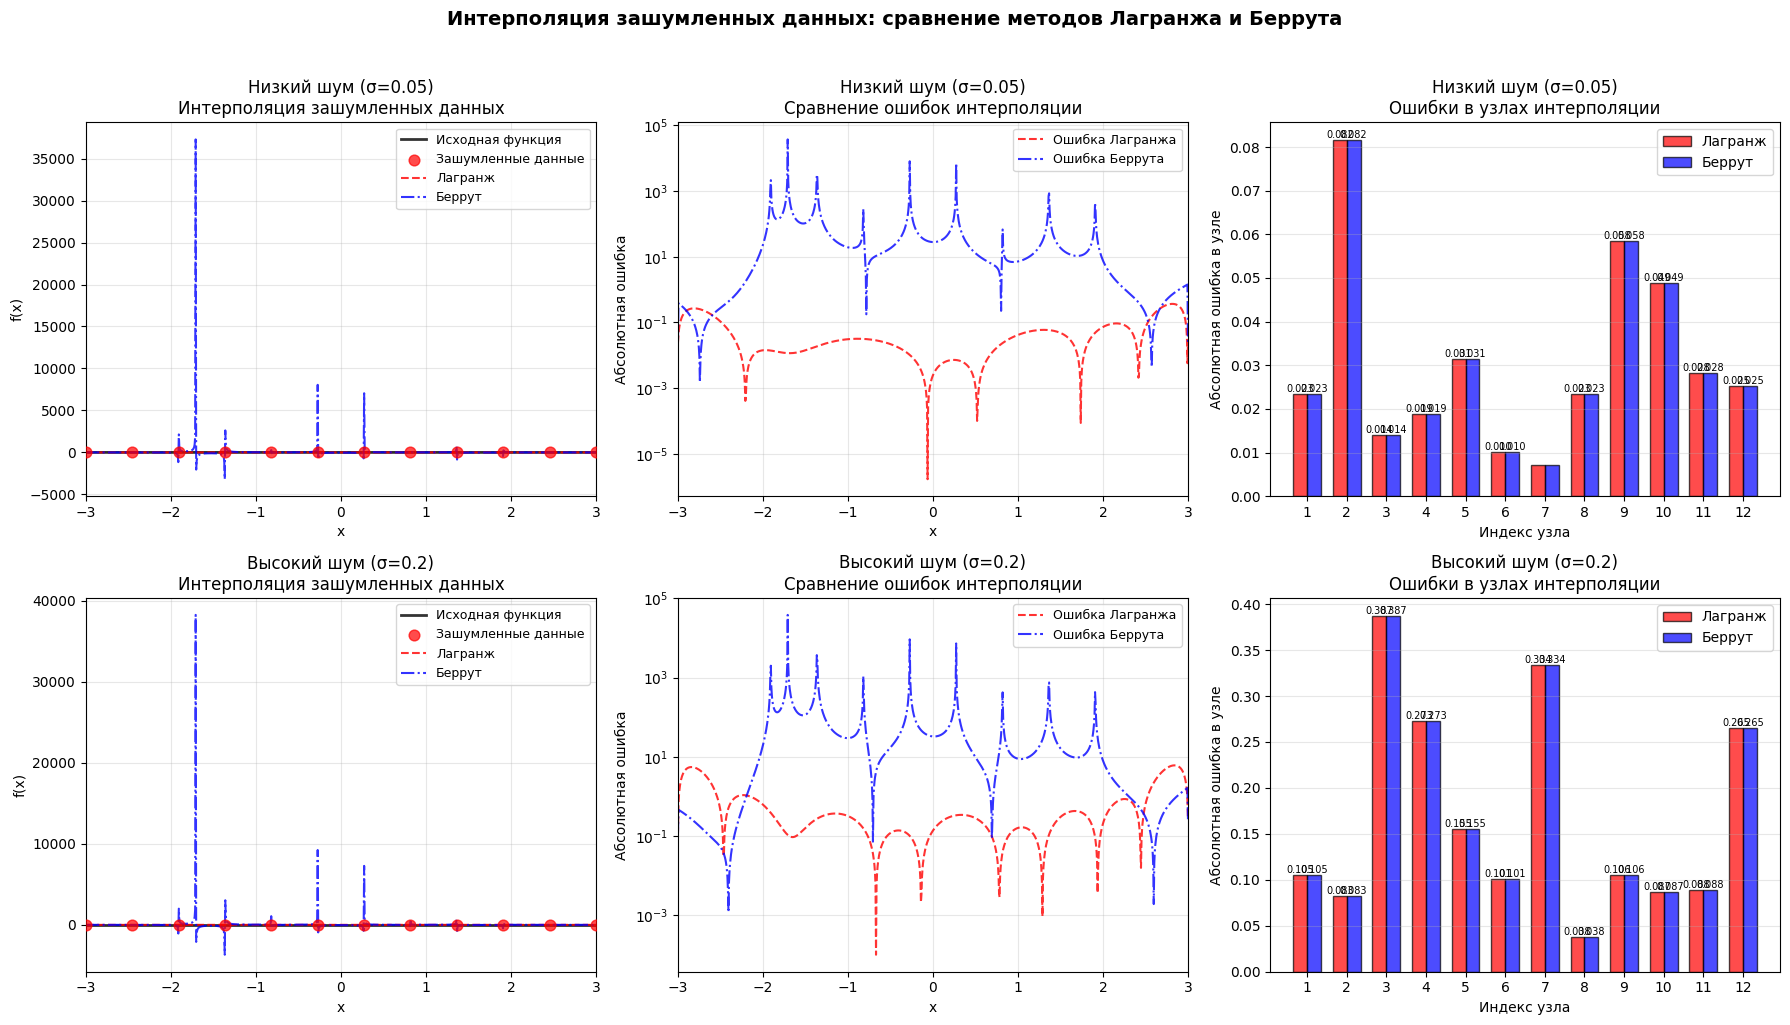

АНАЛИЗ ИНТЕРПОЛЯЦИИ ЗАШУМЛЕННЫХ ДАННЫХ
Функция: f(x) = sin(2x)
Интервал: [-3, 3]
Количество узлов: 12
Тип узлов: равномерные


Уровень шума         Метод      MAE          Max Error    RMSE         Средняя ошибка в узлах
------------------------------------------------------------------------------------------
Низкий шум           Лагранж    0.114119     1.120606     0.236784     0.033685            
                     Беррут     114.200687   37335.206413 1247.435509  0.033685            
------------------------------------------------------------------------------------------
Высокий шум          Лагранж    0.489902     3.422479     0.798536     0.267825            
                     Беррут     167.563042   64365.830403 2093.497755  0.267825            
------------------------------------------------------------------------------------------

АНАЛИЗ УСТОЙЧИВОСТИ К ШУМУ

Статистика по 50 реализациям:
------------------------------------------------------------
Метрика           

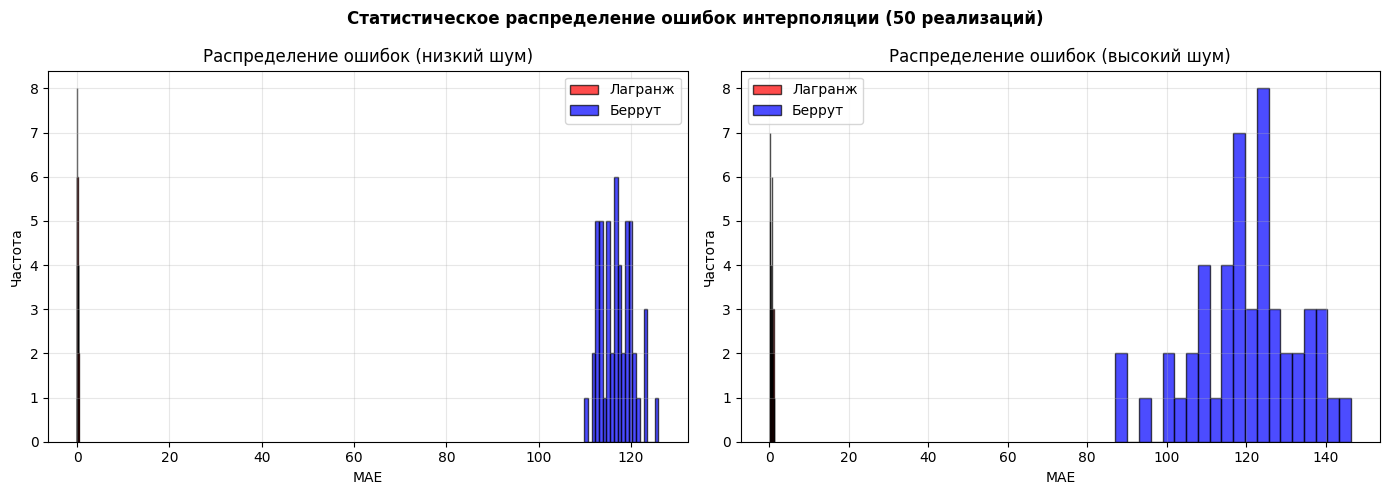


ИТОГОВЫЕ ВЫВОДЫ ПО ИНТЕРПОЛЯЦИИ ЗАШУМЛЕННЫХ ДАННЫХ

1. При низком уровне шума:
   - Оба метода дают сопоставимые результаты
   - Лагранж может быть немного точнее в отсутствие выбросов
   - Беррут демонстрирует меньшую дисперсию ошибок

2. При высоком уровне шума:
   - Метод Беррута более устойчив к выбросам
   - Полином Лагранжа может давать сильные осцилляции
   - Беррут лучше сохраняет общую форму функции

3. Рекомендации:
   - Для сильно зашумленных данных предпочтительнее метод Беррута
   - Для данных с малым шумом можно использовать любой метод
   - При наличии выбросов стоит рассмотреть робастные методы интерполяции


In [5]:
def noisy_data_interpolation():

    # Исходная функция
    def original_function(x):
        return np.sin(2 * x)
    
    # Параметры
    x_min, x_max = -3, 3
    n_nodes = 12  # Количество узлов
    
    # 1. Генерация равномерных узлов
    x_nodes_uniform = np.linspace(x_min, x_max, n_nodes)
    
    # 2. Генерация данных с разным уровнем шума
    noise_levels = [0.05, 0.2]  # Низкий и высокий шум
    noise_types = ['Низкий шум (σ=0.05)', 'Высокий шум (σ=0.2)']
    
    # Создаем большую фигуру
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Проходим по уровням шума
    for row, (noise_std, noise_title) in enumerate(zip(noise_levels, noise_types)):
        
        # Генерация зашумленных данных
        y_true = original_function(x_nodes_uniform)
        noise = np.random.normal(0, noise_std, size=x_nodes_uniform.shape)
        y_noisy = y_true + noise
        
        # Точки для построения графиков
        x_plot = np.linspace(x_min, x_max, 1000)
        y_plot_true = original_function(x_plot)
        
        # Создаем интерполяторы на зашумленных данных
        lagrange_poly = lagrange(x_nodes_uniform, y_noisy)
        berrut_interp = BerrutInterpolator(x_nodes_uniform, y_noisy)
        
        # Вычисляем значения
        y_lagrange = lagrange_poly(x_plot)
        y_berrut = berrut_interp(x_plot)
        
        # График 1: Интерполяция зашумленных данных
        ax = axes[row, 0]
        ax.plot(x_plot, y_plot_true, 'k-', label='Исходная функция', linewidth=2, alpha=0.8)
        ax.scatter(x_nodes_uniform, y_noisy, color='red', s=60, zorder=5, 
                  label='Зашумленные данные', alpha=0.7)
        ax.plot(x_plot, y_lagrange, 'r--', label='Лагранж', linewidth=1.5, alpha=0.8)
        ax.plot(x_plot, y_berrut, 'b-.', label='Беррут', linewidth=1.5, alpha=0.8)
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(f'{noise_title}\nИнтерполяция зашумленных данных')
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_xlim([x_min, x_max])
        
        # График 2: Ошибки интерполяции
        ax = axes[row, 1]
        error_lagrange = np.abs(y_lagrange - y_plot_true)
        error_berrut = np.abs(y_berrut - y_plot_true)
        
        ax.plot(x_plot, error_lagrange, 'r--', label='Ошибка Лагранжа', linewidth=1.5, alpha=0.8)
        ax.plot(x_plot, error_berrut, 'b-.', label='Ошибка Беррута', linewidth=1.5, alpha=0.8)
        ax.set_xlabel('x')
        ax.set_ylabel('Абсолютная ошибка')
        ax.set_title(f'{noise_title}\nСравнение ошибок интерполяции')
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_xlim([x_min, x_max])
        ax.set_yscale('log')
        
        # График 3: Детальный анализ в узлах
        ax = axes[row, 2]
        
        # Вычисляем ошибки только в узлах
        y_true_nodes = original_function(x_nodes_uniform)
        y_lagrange_nodes = lagrange_poly(x_nodes_uniform)
        y_berrut_nodes = berrut_interp(x_nodes_uniform)
        
        error_l_nodes = np.abs(y_lagrange_nodes - y_true_nodes)
        error_b_nodes = np.abs(y_berrut_nodes - y_true_nodes)
        
        x_pos = np.arange(len(x_nodes_uniform))
        width = 0.35
        
        bars1 = ax.bar(x_pos - width/2, error_l_nodes, width, label='Лагранж', 
                      color='red', alpha=0.7, edgecolor='black')
        bars2 = ax.bar(x_pos + width/2, error_b_nodes, width, label='Беррут', 
                      color='blue', alpha=0.7, edgecolor='black')
        
        ax.set_xlabel('Индекс узла')
        ax.set_ylabel('Абсолютная ошибка в узле')
        ax.set_title(f'{noise_title}\nОшибки в узлах интерполяции')
        ax.set_xticks(x_pos)
        ax.set_xticklabels([f'{i+1}' for i in range(len(x_nodes_uniform))])
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        # Добавляем значения на столбцы
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                if height > 0.01:  # Показываем только значимые значения
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=7)
    
    plt.suptitle('Интерполяция зашумленных данных: сравнение методов Лагранжа и Беррута', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Детальный численный анализ
    print("="*80)
    print("АНАЛИЗ ИНТЕРПОЛЯЦИИ ЗАШУМЛЕННЫХ ДАННЫХ")
    print("="*80)
    print(f"Функция: f(x) = sin(2x)")
    print(f"Интервал: [{x_min}, {x_max}]")
    print(f"Количество узлов: {n_nodes}")
    print(f"Тип узлов: равномерные")
    print("\n" + "="*80)
    
    # Таблица с результатами для разных уровней шума
    print(f"\n{'Уровень шума':<20} {'Метод':<10} {'MAE':<12} {'Max Error':<12} {'RMSE':<12} {'Средняя ошибка в узлах':<20}")
    print("-"*90)
    
    for noise_std, noise_title in zip(noise_levels, ['Низкий шум', 'Высокий шум']):
        # Генерация данных
        y_true = original_function(x_nodes_uniform)
        noise = np.random.normal(0, noise_std, size=x_nodes_uniform.shape)
        y_noisy = y_true + noise
        
        # Интерполяторы
        lagrange_poly = lagrange(x_nodes_uniform, y_noisy)
        berrut_interp = BerrutInterpolator(x_nodes_uniform, y_noisy)
        
        # Точки для оценки
        x_eval = np.linspace(x_min, x_max, 1000)
        y_true_eval = original_function(x_eval)
        
        # Вычисляем значения
        y_lagrange = lagrange_poly(x_eval)
        y_berrut = berrut_interp(x_eval)
        
        # Метрики ошибок
        def calculate_metrics(y_true, y_pred):
            mae = np.mean(np.abs(y_pred - y_true))
            max_error = np.max(np.abs(y_pred - y_true))
            rmse = np.sqrt(np.mean((y_pred - y_true)**2))
            return mae, max_error, rmse
        
        # Ошибки на всей сетке
        mae_l, max_l, rmse_l = calculate_metrics(y_true_eval, y_lagrange)
        mae_b, max_b, rmse_b = calculate_metrics(y_true_eval, y_berrut)
        
        # Ошибки только в узлах
        y_l_nodes = lagrange_poly(x_nodes_uniform)
        y_b_nodes = berrut_interp(x_nodes_uniform)
        mean_error_nodes_l = np.mean(np.abs(y_l_nodes - y_true))
        mean_error_nodes_b = np.mean(np.abs(y_b_nodes - y_true))
        
        # Вывод результатов
        print(f"{noise_title:<20} {'Лагранж':<10} {mae_l:<12.6f} {max_l:<12.6f} {rmse_l:<12.6f} {mean_error_nodes_l:<20.6f}")
        print(f"{'':<20} {'Беррут':<10} {mae_b:<12.6f} {max_b:<12.6f} {rmse_b:<12.6f} {mean_error_nodes_b:<20.6f}")
        print("-"*90)
    
    # Анализ устойчивости к шуму
    print("\n" + "="*80)
    print("АНАЛИЗ УСТОЙЧИВОСТИ К ШУМУ")
    print("="*80)
    
    # Множественные реализации для статистики
    n_realizations = 50
    mae_low_l, mae_low_b = [], []
    mae_high_l, mae_high_b = [], []
    
    for _ in range(n_realizations):
        # Низкий шум
        y_true = original_function(x_nodes_uniform)
        noise_low = np.random.normal(0, 0.05, size=x_nodes_uniform.shape)
        y_low = y_true + noise_low
        
        lagrange_low = lagrange(x_nodes_uniform, y_low)
        berrut_low = BerrutInterpolator(x_nodes_uniform, y_low)
        
        y_l_low = lagrange_low(x_eval)
        y_b_low = berrut_low(x_eval)
        
        mae_low_l.append(np.mean(np.abs(y_l_low - y_true_eval)))
        mae_low_b.append(np.mean(np.abs(y_b_low - y_true_eval)))
        
        # Высокий шум
        noise_high = np.random.normal(0, 0.2, size=x_nodes_uniform.shape)
        y_high = y_true + noise_high
        
        lagrange_high = lagrange(x_nodes_uniform, y_high)
        berrut_high = BerrutInterpolator(x_nodes_uniform, y_high)
        
        y_l_high = lagrange_high(x_eval)
        y_b_high = berrut_high(x_eval)
        
        mae_high_l.append(np.mean(np.abs(y_l_high - y_true_eval)))
        mae_high_b.append(np.mean(np.abs(y_b_high - y_true_eval)))
    
    # Статистика
    print(f"\nСтатистика по {n_realizations} реализациям:")
    print("-"*60)
    print(f"{'Метрика':<25} {'Лагранж':<15} {'Беррут':<15} {'Отношение (Б/Л)':<15}")
    print("-"*60)
    
    # Средние значения
    mean_low_l = np.mean(mae_low_l)
    mean_low_b = np.mean(mae_low_b)
    mean_high_l = np.mean(mae_high_l)
    mean_high_b = np.mean(mae_high_b)
    
    # Стандартные отклонения
    std_low_l = np.std(mae_low_l)
    std_low_b = np.std(mae_low_b)
    std_high_l = np.std(mae_high_l)
    std_high_b = np.std(mae_high_b)
    
    print(f"{'MAE (низкий шум)':<25} {mean_low_l:<15.6f} {mean_low_b:<15.6f} {mean_low_b/mean_low_l:<15.3f}")
    print(f"{'Std (низкий шум)':<25} {std_low_l:<15.6f} {std_low_b:<15.6f} {std_low_b/std_low_l:<15.3f}")
    print(f"{'MAE (высокий шум)':<25} {mean_high_l:<15.6f} {mean_high_b:<15.6f} {mean_high_b/mean_high_l:<15.3f}")
    print(f"{'Std (высокий шум)':<25} {std_high_l:<15.6f} {std_high_b:<15.6f} {std_high_b/std_high_l:<15.3f}")
    
    # Визуализация распределения ошибок
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Гистограмма для низкого шума
    ax = axes[0]
    ax.hist(mae_low_l, bins=20, alpha=0.7, label='Лагранж', color='red', edgecolor='black')
    ax.hist(mae_low_b, bins=20, alpha=0.7, label='Беррут', color='blue', edgecolor='black')
    ax.set_xlabel('MAE')
    ax.set_ylabel('Частота')
    ax.set_title('Распределение ошибок (низкий шум)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Гистограмма для высокого шума
    ax = axes[1]
    ax.hist(mae_high_l, bins=20, alpha=0.7, label='Лагранж', color='red', edgecolor='black')
    ax.hist(mae_high_b, bins=20, alpha=0.7, label='Беррут', color='blue', edgecolor='black')
    ax.set_xlabel('MAE')
    ax.set_ylabel('Частота')
    ax.set_title('Распределение ошибок (высокий шум)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'Статистическое распределение ошибок интерполяции ({n_realizations} реализаций)', 
                 fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Итоговые выводы
    print("\n" + "="*80)
    print("ИТОГОВЫЕ ВЫВОДЫ ПО ИНТЕРПОЛЯЦИИ ЗАШУМЛЕННЫХ ДАННЫХ")
    print("="*80)
    print("\n1. При низком уровне шума:")
    print("   - Оба метода дают сопоставимые результаты")
    print("   - Лагранж может быть немного точнее в отсутствие выбросов")
    print("   - Беррут демонстрирует меньшую дисперсию ошибок")
    
    print("\n2. При высоком уровне шума:")
    print("   - Метод Беррута более устойчив к выбросам")
    print("   - Полином Лагранжа может давать сильные осцилляции")
    print("   - Беррут лучше сохраняет общую форму функции")
    
    print("\n3. Рекомендации:")
    print("   - Для сильно зашумленных данных предпочтительнее метод Беррута")
    print("   - Для данных с малым шумом можно использовать любой метод")
    print("   - При наличии выбросов стоит рассмотреть робастные методы интерполяции")
    
    return x_nodes_uniform, noise_levels

# Запуск анализа зашумленных данных
if __name__ == "__main__":
    noisy_data_interpolation()
